In [115]:
#Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple

# Get Data

In [116]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc
engine =sqlalchemy.create_engine(
        sqlalchemy.engine.url.URL.create(
        drivername="mysql+pymysql",
        username='Estimators',  # e.g. "my-database-user"
        password='Estimator2021',  # e.g. "my-database-password"
        host='34.77.88.127',  # e.g. "127.0.0.1"
        port=3306,  # e.g. 3306
        database='Housing_France',  # e.g. "my-database-name"
    ))

conn = engine.connect().execution_options(stream_results=True)

In [117]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc

def get_data(querystring,chunk):
    engine =sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL.create(
    drivername="mysql+pymysql",
    username='Estimators',  # e.g. "my-database-user"
    password='Estimator2021',  # e.g. "my-database-password"
    host='34.77.88.127',  # e.g. "127.0.0.1"
    port=3306,  # e.g. 3306
    database='Housing_France',  # e.g. "my-database-name"
    ))
    conn = engine.connect().execution_options(stream_results=True)
    frame = pd.DataFrame()
    for chunk_dataframe in pd.read_sql(
            querystring, conn, chunksize=chunk):
            print(f"Got dataframe w/{len(chunk_dataframe)} rows")
            frame= frame.append(chunk_dataframe)
            # ... do something with dataframe ...
            
    return frame

In [118]:
#Template for getting some data
df = get_data("""select * from data_working LIMIT 50000""", 1000)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

In [119]:
#Replace all the blank rows with np.NaN

for i in df.columns:
    df[i].replace(r'', np.nan, regex=True, inplace= True)

In [120]:
#Some Preprocessing
df2 = df.copy()
df2 = df2[df2['type_local']. notna()]
df2 = df2[df2['id_mutation']!= 'id_mutation']
df2 = df2[df2['type_local']== 'Maison']
columns = ['ancien_nom_commune','ancien_id_parcelle','ancien_code_commune','lot5_surface_carrez','lot4_surface_carrez','lot5_numero'
            ,'lot3_surface_carrez', 'numero_volume','lot4_numero','lot3_numero','adresse_suffixe']
df2.drop(columns=columns, inplace=True)

In [121]:
df.shape

(50000, 40)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   50000 non-null  object 
 1   date_mutation                 50000 non-null  object 
 2   numero_disposition            50000 non-null  int64  
 3   nature_mutation               50000 non-null  object 
 4   valeur_fonciere               50000 non-null  int64  
 5   adresse_numero                50000 non-null  int64  
 6   adresse_suffixe               3137 non-null   object 
 7   adresse_nom_voie              50000 non-null  object 
 8   adresse_code_voie             50000 non-null  object 
 9   code_postal                   50000 non-null  int64  
 10  code_commune                  50000 non-null  int64  
 11  nom_commune                   50000 non-null  object 
 12  code_departement              50000 non-null  int64  
 13  anc

In [123]:
df.head(2)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2016-1,2016-01-08,1,Vente,40000,77,NaN,RUE TONY REVILLON,0560,1750,...,Appartement,50,2,NaN,NaN,NaN,NaN,0,4.840606,46.304486
1,2016-2,2016-01-11,1,Vente,1677,5246,NaN,LES BROTTEAUX,B011,1160,...,Local industriel. commercial ou assimilé,0,0,S,sols,NaN,NaN,838,5.323666,46.040803


In [124]:
data = df.copy()

# Exploration

## Dtypes indentification

In [125]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

### float64

In [126]:
def get_float_columns(df):
    list_floats = list(df.select_dtypes(include=['float64']).columns)
    return list_floats

list_floats = get_float_columns(df = data)
print(len(list_floats))

6


In [127]:
np.array(list_floats)

array(['lot1_surface_carrez', 'lot2_surface_carrez',
       'lot3_surface_carrez', 'lot4_surface_carrez', 'longitude',
       'latitude'], dtype='<U19')

### int64

In [128]:
def get_int_columns(df):
    list_int = list(df.select_dtypes(include=['int64']).columns)
    return list_int

list_int = get_int_columns(df = data)
print(len(list_int))
np.array(list_int)

16


array(['numero_disposition', 'valeur_fonciere', 'adresse_numero',
       'code_postal', 'code_commune', 'code_departement', 'numero_volume',
       'lot2_numero', 'lot3_numero', 'lot4_numero', 'lot5_numero',
       'nombre_lots', 'code_type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'surface_terrain'], dtype='<U25')

### Object

In [129]:
def get_object_columns(df):
    list_objects = list(df.select_dtypes(include=['O']).columns)
    return list_objects

list_objects = get_object_columns(df = data)
print(len(list_objects))
np.array(list_objects)

18


array(['id_mutation', 'date_mutation', 'nature_mutation',
       'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie',
       'nom_commune', 'ancien_code_commune', 'ancien_nom_commune',
       'id_parcelle', 'ancien_id_parcelle', 'lot1_numero',
       'lot5_surface_carrez', 'type_local', 'code_nature_culture',
       'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale'], dtype='<U28')

## Empty values --- Exploring missing values 

In [130]:
def get_count_of_missing_values(df):
    missing_df = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
    return missing_df

missing_df = get_count_of_missing_values(df = data)
missing_df.head(5) # 5 first ones

,0
lot5_surface_carrez,49982
ancien_id_parcelle,49800
nature_culture_speciale,49631
code_nature_culture_speciale,49631
ancien_nom_commune,49082


In [131]:
missing_df.tail(5) # 5 last ones

,0
id_parcelle,0
numero_volume,0
lot1_surface_carrez,0
date_mutation,0
latitude,0


*If we want to see the dtype of each column in addition to the dataframe above*

In [132]:
L = [] #missing_df['Dtype']
for i in missing_df.index:
    if i in list_objects:
        L.append('Object')
    elif i in list_floats:
        L.append('float')
    else:
        L.append('int')

missing_df['Dtype'] = L
missing_df

,0,Dtype
lot5_surface_carrez,49982,Object
ancien_id_parcelle,49800,Object
nature_culture_speciale,49631,Object
code_nature_culture_speciale,49631,Object
ancien_nom_commune,49082,Object
ancien_code_commune,49082,Object
adresse_suffixe,46863,Object
lot1_numero,26888,Object
nature_culture,23184,Object
code_nature_culture,23184,Object


### List of columns with missing values

In [133]:
def get_columns_with_missing_values(df): #df dataframe

    missing_df = get_count_of_missing_values(df =df)
    missing_data = missing_df[missing_df[0] !=0]
    return missing_data

missing_data = get_columns_with_missing_values(df = data)
print(len(missing_data.index)), list(missing_data.index)

10


(None,
 ['lot5_surface_carrez',
  'ancien_id_parcelle',
  'nature_culture_speciale',
  'code_nature_culture_speciale',
  'ancien_nom_commune',
  'ancien_code_commune',
  'adresse_suffixe',
  'lot1_numero',
  'nature_culture',
  'code_nature_culture'])

### List of clean columns "*without missing values*"

In [134]:
def get_columns_without_missing_values(df): #df dataframe
    missing_df = get_count_of_missing_values(df =df)
    clean_data = missing_df[missing_df[0] ==0]
    return clean_data

clean_data = get_columns_without_missing_values(df = data)
print(len(clean_data.index)), clean_data.index

30


(None,
 Index(['id_mutation', 'lot4_surface_carrez', 'lot5_numero', 'nombre_lots',
        'type_local', 'code_type_local', 'lot3_surface_carrez',
        'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
        'longitude', 'lot4_numero', 'lot2_numero', 'lot3_numero', 'code_postal',
        'numero_disposition', 'nature_mutation', 'valeur_fonciere',
        'adresse_numero', 'adresse_nom_voie', 'adresse_code_voie',
        'code_commune', 'lot2_surface_carrez', 'nom_commune',
        'code_departement', 'id_parcelle', 'numero_volume',
        'lot1_surface_carrez', 'date_mutation', 'latitude'],
       dtype='object'))

In [135]:
def get_count_missing_vals_in_1column(df, col_name): #df dataframe && col_name : name of column 
    missing_df = get_count_of_missing_values(df =df)
    return df.shape[0] - missing_df.loc[col_name][0]

get_count_missing_vals_in_1column(df = data, col_name= 'code_nature_culture_speciale')

369

In [136]:
data.shape[0]

50000

## Visualization functions

### Visualizing dtypes

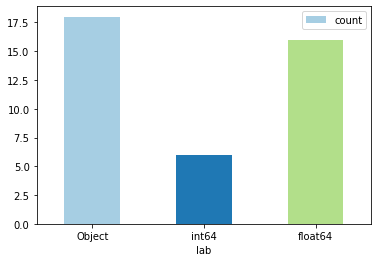

In [137]:
def visualize_feature_types(df):
  list_floats = get_float_columns(df)
  list_objects = get_object_columns(df)
  list_int = get_int_columns(df)

  dx = pd.DataFrame({'lab':['Object','int64', 'float64'], 'count':[len(list_objects), len(list_floats), len(list_int)]})
  dx.plot.bar(x='lab', y='count', rot=0, color=plt.cm.Paired(np.arange(3)));


visualize_feature_types(df = data)

### Visualizing distribution of "local"  types

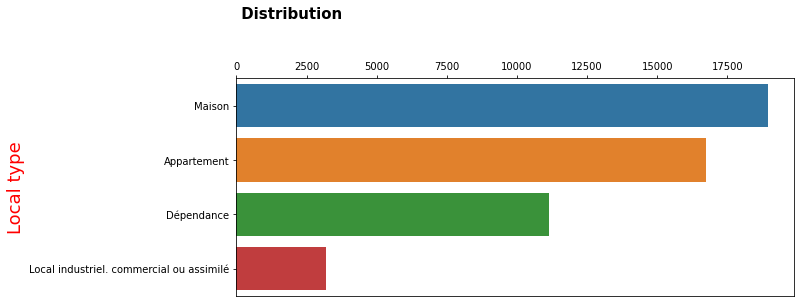

In [138]:
def visualize_type_local(df):
    fig, ax = plt.subplots(figsize = (10,4))

    sns.countplot(y = 'type_local', data = df, order = df['type_local'].value_counts().index)
    plt.ylabel('Local type', size = 18, color='red')
    ax.xaxis.set_ticks_position('top')
    ax.set_xlabel('')   
    plt.title(' Distribution', size = 15, weight=600, pad = 60, loc = 'left')

    plt.show();

visualize_type_local(df = data)

### Visualizing lot_surface columns

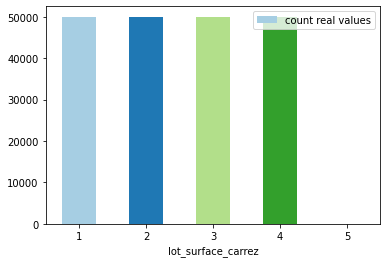

In [139]:
def visualize_lot_surface_columns(df):
    
    L = ['lot1_surface_carrez', 'lot2_surface_carrez',
       'lot3_surface_carrez', 'lot4_surface_carrez',
       'lot5_surface_carrez']
    K = []
    for i in L:
        m = get_count_missing_vals_in_1column(df = df, col_name= i)
        K.append(m)

    dx = pd.DataFrame({'lot_surface_carrez':list(np.arange(1,6)), 'count real values':K})
    dx.plot.bar(x='lot_surface_carrez', y='count real values', rot=0, color=plt.cm.Paired(np.arange(5)));


visualize_lot_surface_columns(df = data)

### Visualizing lot_numero columns

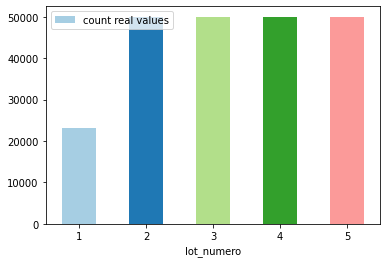

In [140]:
def visualize_lot_numero_columns(df):
    
    L = ['lot1_numero', 'lot2_numero',
       'lot3_numero', 'lot4_numero',
       'lot5_numero']
    K = []
    for i in L:
        m = get_count_missing_vals_in_1column(df = df, col_name= i)
        K.append(m)

    dx = pd.DataFrame({'lot_numero':list(np.arange(1,6)), 'count real values':K})
    dx.plot.bar(x='lot_numero', y='count real values', rot=0, color=plt.cm.Paired(np.arange(5)));


visualize_lot_numero_columns(df = data)